Designing
& developing a machine learning model which can predict whether person suffer
from diabetes or not on diabetes.csv.


·       Performing the EDA


·       Applying logistic regression


·       Applying Decision tree algorithm


·       Applying KNN


·       Evaluating the performance using
Precision, Recall, F1 score and accuracy.
        Applying hyper parameter tuning to improve
performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(768, 9)

<Axes: >

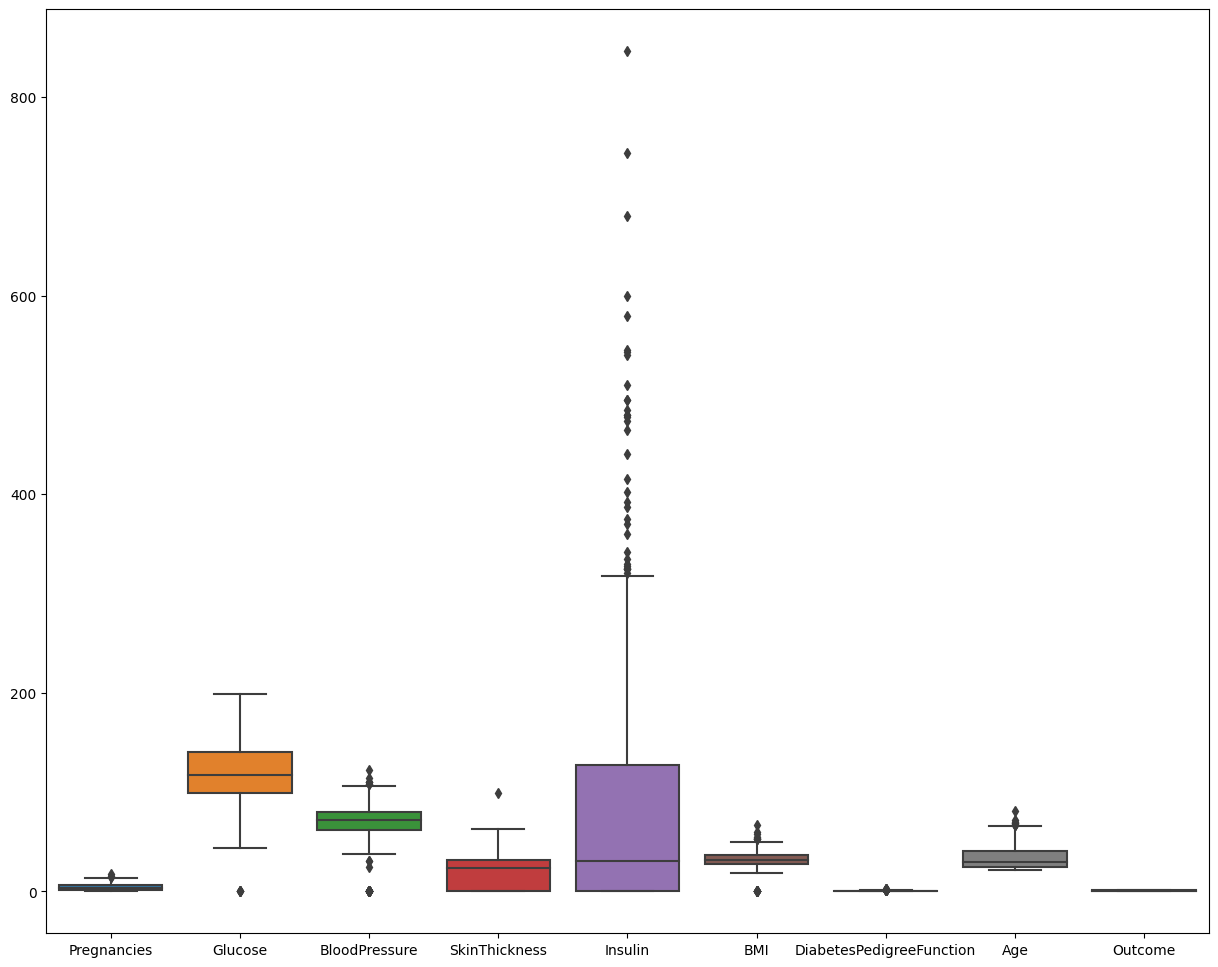

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])

In [ ]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Pregnancies attribute : [14, 14, 15, 17]
Outliers in Glucose attribute : [0, 0, 0, 0, 0]
Outliers in BloodPressure attribute : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 30, 30, 108, 108, 110, 110, 110, 114, 122]
Outliers in SkinThickness attribute : [99]
Outliers in Insulin attribute : [321, 325, 325, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415, 440, 465, 474, 478, 480, 480, 485, 495, 495, 510, 540, 543, 545, 579, 600, 680, 744, 846]
Outliers in BMI attribute : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.3, 52.3, 52.9, 53.2, 55.0, 57.3, 59.4, 67.1]
Outliers in DiabetesPedigreeFunction attribute : [1.213, 1.222, 1.224, 1.224, 1.251, 1.258, 1.268, 1.282, 1.292, 1.318, 1.321, 1.353, 1.39, 1.391, 1.394, 1.4, 1.441, 1.461, 1.476, 1.6, 1.698, 1.699, 1.731, 1.781, 1.893, 2.137, 2.288, 2.329, 2.42]
Outliers in Age attribute : [67, 67, 67, 68, 69, 69, 70, 72, 81]
Outliers in Outcom

In [ ]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    df[i]=handle_outliers(df[i])

<Axes: >

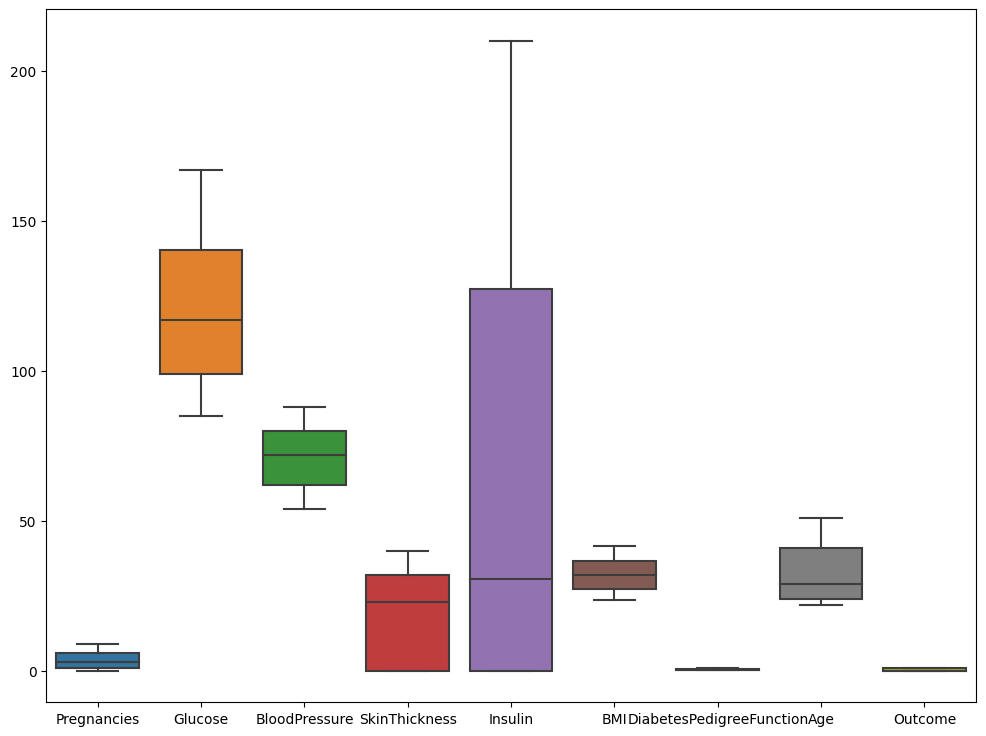

In [ ]:

plt.figure(figsize=(12,9))
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])

In [ ]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [ ]:
df.Pregnancies.value_counts()

1.0    135
0.0    111
2.0    103
9.0     86
3.0     75
4.0     68
5.0     57
6.0     50
7.0     45
8.0     38
Name: Pregnancies, dtype: int64

In [ ]:
df.Glucose.value_counts()

167.0    79
85.0     79
99.0     17
100.0    17
125.0    14
         ..
153.0     2
157.0     2
159.0     2
160.0     1
149.0     1
Name: Glucose, Length: 83, dtype: int64

In [ ]:
df.BloodPressure.value_counts()

54.0    86
88.0    85
70.0    57
74.0    52
78.0    45
68.0    45
72.0    44
64.0    43
80.0    40
76.0    39
60.0    37
62.0    34
82.0    30
66.0    30
84.0    23
58.0    21
86.0    21
56.0    12
75.0     8
65.0     7
85.0     6
55.0     2
61.0     1
Name: BloodPressure, dtype: int64

In [ ]:
df.SkinThickness.value_counts()

0.0     227
40.0     90
32.0     31
30.0     27
27.0     23
23.0     22
33.0     20
18.0     20
28.0     20
31.0     19
19.0     18
39.0     18
29.0     17
26.0     16
22.0     16
37.0     16
25.0     16
35.0     15
36.0     14
15.0     14
17.0     14
20.0     13
24.0     12
13.0     11
21.0     10
34.0      8
38.0      7
12.0      7
11.0      6
14.0      6
16.0      6
10.0      5
7.0       2
8.0       2
Name: SkinThickness, dtype: int64

In [ ]:
df.Insulin.value_counts()

0.0      374
210.0     80
105.0     11
130.0      9
140.0      9
        ... 
59.0       1
81.0       1
196.0      1
146.0      1
112.0      1
Name: Insulin, Length: 125, dtype: int64

In [ ]:
df.BMI.value_counts()

23.6    79
41.5    78
32.0    13
31.6    12
31.2    12
        ..
28.1     1
36.2     1
37.0     1
24.5     1
41.2     1
Name: BMI, Length: 166, dtype: int64

In [ ]:
df.DiabetesPedigreeFunction.value_counts()

0.1650    79
0.8786    77
0.2580     6
0.2540     6
0.2590     5
          ..
0.6550     1
0.6120     1
0.2260     1
0.6770     1
0.1710     1
Name: DiabetesPedigreeFunction, Length: 394, dtype: int64

In [ ]:
df.Age.value_counts()

22.0    135
51.0     81
25.0     48
24.0     46
23.0     38
28.0     35
26.0     33
27.0     32
29.0     29
31.0     24
41.0     22
30.0     21
37.0     19
42.0     18
33.0     17
38.0     16
32.0     16
36.0     16
45.0     15
34.0     14
46.0     13
40.0     13
43.0     13
39.0     12
35.0     10
50.0      8
44.0      8
47.0      6
48.0      5
49.0      5
Name: Age, dtype: int64

In [ ]:
df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
columns_to_Drop=["DiabetesPedigreeFunction"]

In [ ]:
df = df.drop(columns_to_Drop, axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0.0
2,8.0,167.0,64.0,0.0,0.0,23.6,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,22.0,0.0
4,0.0,137.0,54.0,35.0,168.0,41.5,33.0,1.0


Text(0.5, 1.0, 'Correlation map')

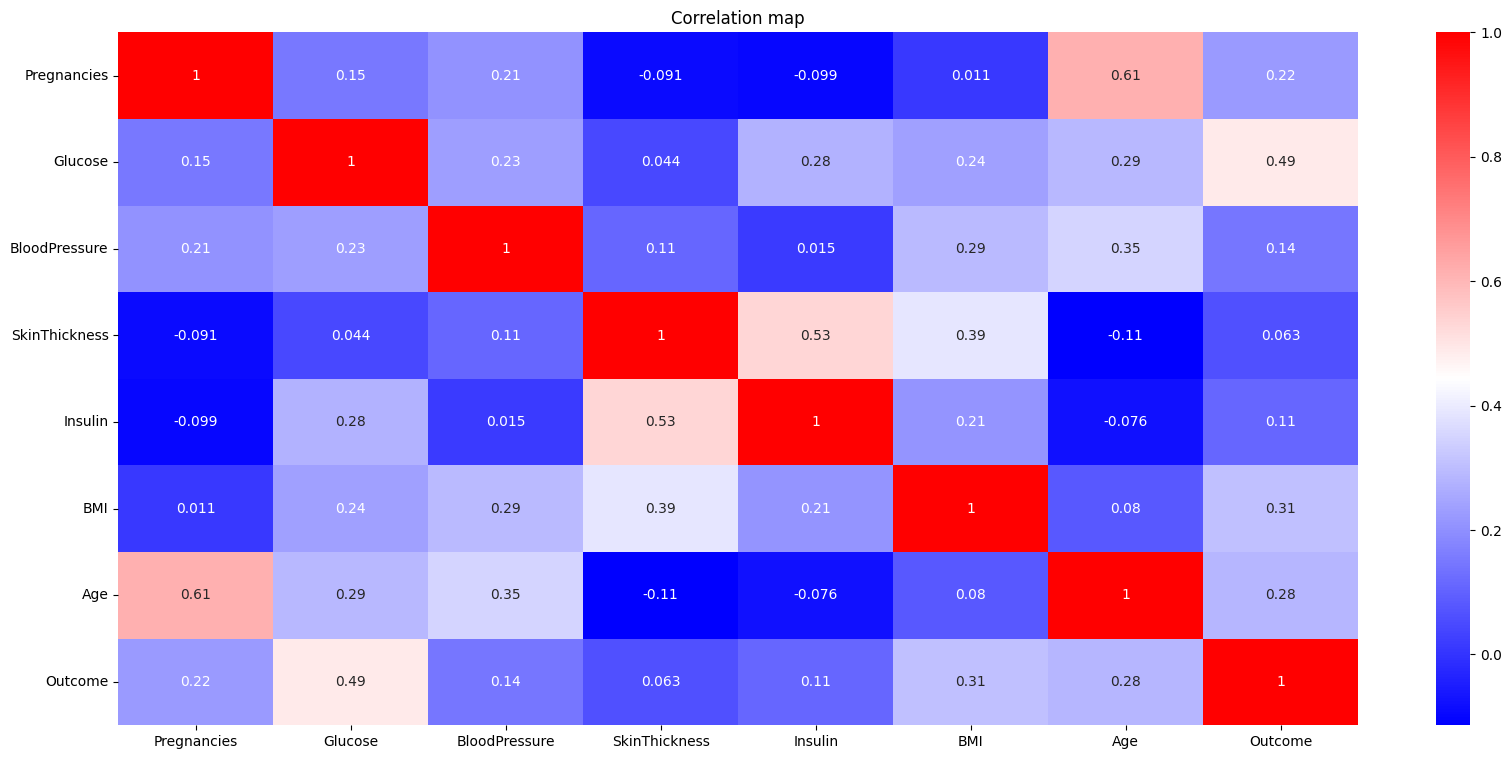

In [ ]:
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI',  'Age']]
y = df['Outcome']

In [ ]:
X.shape,y.shape

((768, 7), (768,))

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0
2,8.0,167.0,64.0,0.0,0.0,23.6,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,22.0
4,0.0,137.0,54.0,35.0,168.0,41.5,33.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 7), (192, 7), (576,), (192,))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0.])

In [ ]:
y_test

239    0.0
243    1.0
764    0.0
122    0.0
33     0.0
      ... 
653    0.0
53     1.0
12     0.0
237    1.0
48     1.0
Name: Outcome, Length: 192, dtype: float64

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7760416666666666

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[109,  18],
       [ 25,  40]])

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[109,  18],
       [ 25,  40]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       127
         1.0       0.69      0.62      0.65        65

    accuracy                           0.78       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192



In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
mymodel(dt)

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       146
         1.0       0.62      0.65      0.64        85

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



DecisionTreeClassifier()

In [ ]:

dt.feature_importances_

array([0.07234848, 0.32640387, 0.10494077, 0.05085088, 0.0787312 ,
       0.24716561, 0.11955919])

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       146
         1.0       0.60      0.65      0.62        85

    accuracy                           0.71       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.71      0.72       231



DecisionTreeClassifier(max_depth=10)

In [ ]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7532467532467533
2: 0.7575757575757576
3: 0.7575757575757576
4: 0.7662337662337663
5: 0.7402597402597403
6: 0.7619047619047619
7: 0.7445887445887446
8: 0.7012987012987013
9: 0.7056277056277056
10: 0.7056277056277056
11: 0.7272727272727273
12: 0.7316017316017316
13: 0.7142857142857143
14: 0.7142857142857143
15: 0.696969696969697
16: 0.7229437229437229
17: 0.70995670995671
18: 0.7186147186147186
19: 0.696969696969697
20: 0.7186147186147186
21: 0.70995670995671
22: 0.7186147186147186
23: 0.7142857142857143
24: 0.7142857142857143
25: 0.7012987012987013
26: 0.70995670995671
27: 0.70995670995671
28: 0.7186147186147186
29: 0.7142857142857143
30: 0.7272727272727273
31: 0.70995670995671
32: 0.7056277056277056
33: 0.7142857142857143
34: 0.7316017316017316
35: 0.70995670995671
36: 0.7229437229437229
37: 0.7142857142857143
38: 0.7142857142857143
39: 0.7142857142857143
40: 0.7186147186147186
41: 0.7056277056277056
42: 0.7056277056277056
43: 0.7229437229437229
44: 0.7186147186147186
45: 0.70129

In [ ]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       146
         1.0       0.62      0.67      0.64        85

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.73      0.73      0.73       231



DecisionTreeClassifier(max_depth=11)

In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       146
         1.0       0.68      0.56      0.62        85

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7056277056277056
2: 0.7186147186147186
3: 0.7272727272727273
4: 0.7359307359307359
5: 0.7489177489177489
6: 0.7272727272727273
7: 0.7229437229437229
8: 0.7532467532467533
9: 0.7445887445887446
10: 0.7402597402597403
11: 0.7489177489177489
12: 0.7489177489177489
13: 0.7575757575757576
14: 0.7489177489177489
15: 0.7402597402597403
16: 0.7489177489177489
17: 0.7489177489177489
18: 0.7532467532467533
19: 0.7445887445887446
20: 0.7445887445887446
21: 0.7359307359307359
22: 0.7402597402597403
23: 0.7489177489177489
24: 0.7489177489177489
25: 0.7489177489177489
26: 0.7489177489177489
27: 0.7489177489177489
28: 0.7489177489177489
29: 0.7489177489177489
30: 0.7489177489177489
31: 0.7489177489177489
32: 0.7619047619047619
33: 0.7619047619047619
34: 0.7619047619047619
35: 0.7619047619047619
36: 0.7619047619047619
37: 0.7662337662337663
38: 0.7662337662337663
39: 0.7922077922077922
40: 0.7922077922077922
41: 0.7922077922077922
42: 0.7922077922077922
43: 0.7922077922077922
44: 0.78354978354978

In [ ]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=41)
mymodel(dt6)

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       146
         1.0       0.74      0.67      0.70        85

    accuracy                           0.79       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



DecisionTreeClassifier(min_samples_leaf=41)

In [ ]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=100,max_depth=3)
mymodel(dt7)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       146
         1.0       0.67      0.69      0.68        85

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.76      0.76      0.76       231



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=100)

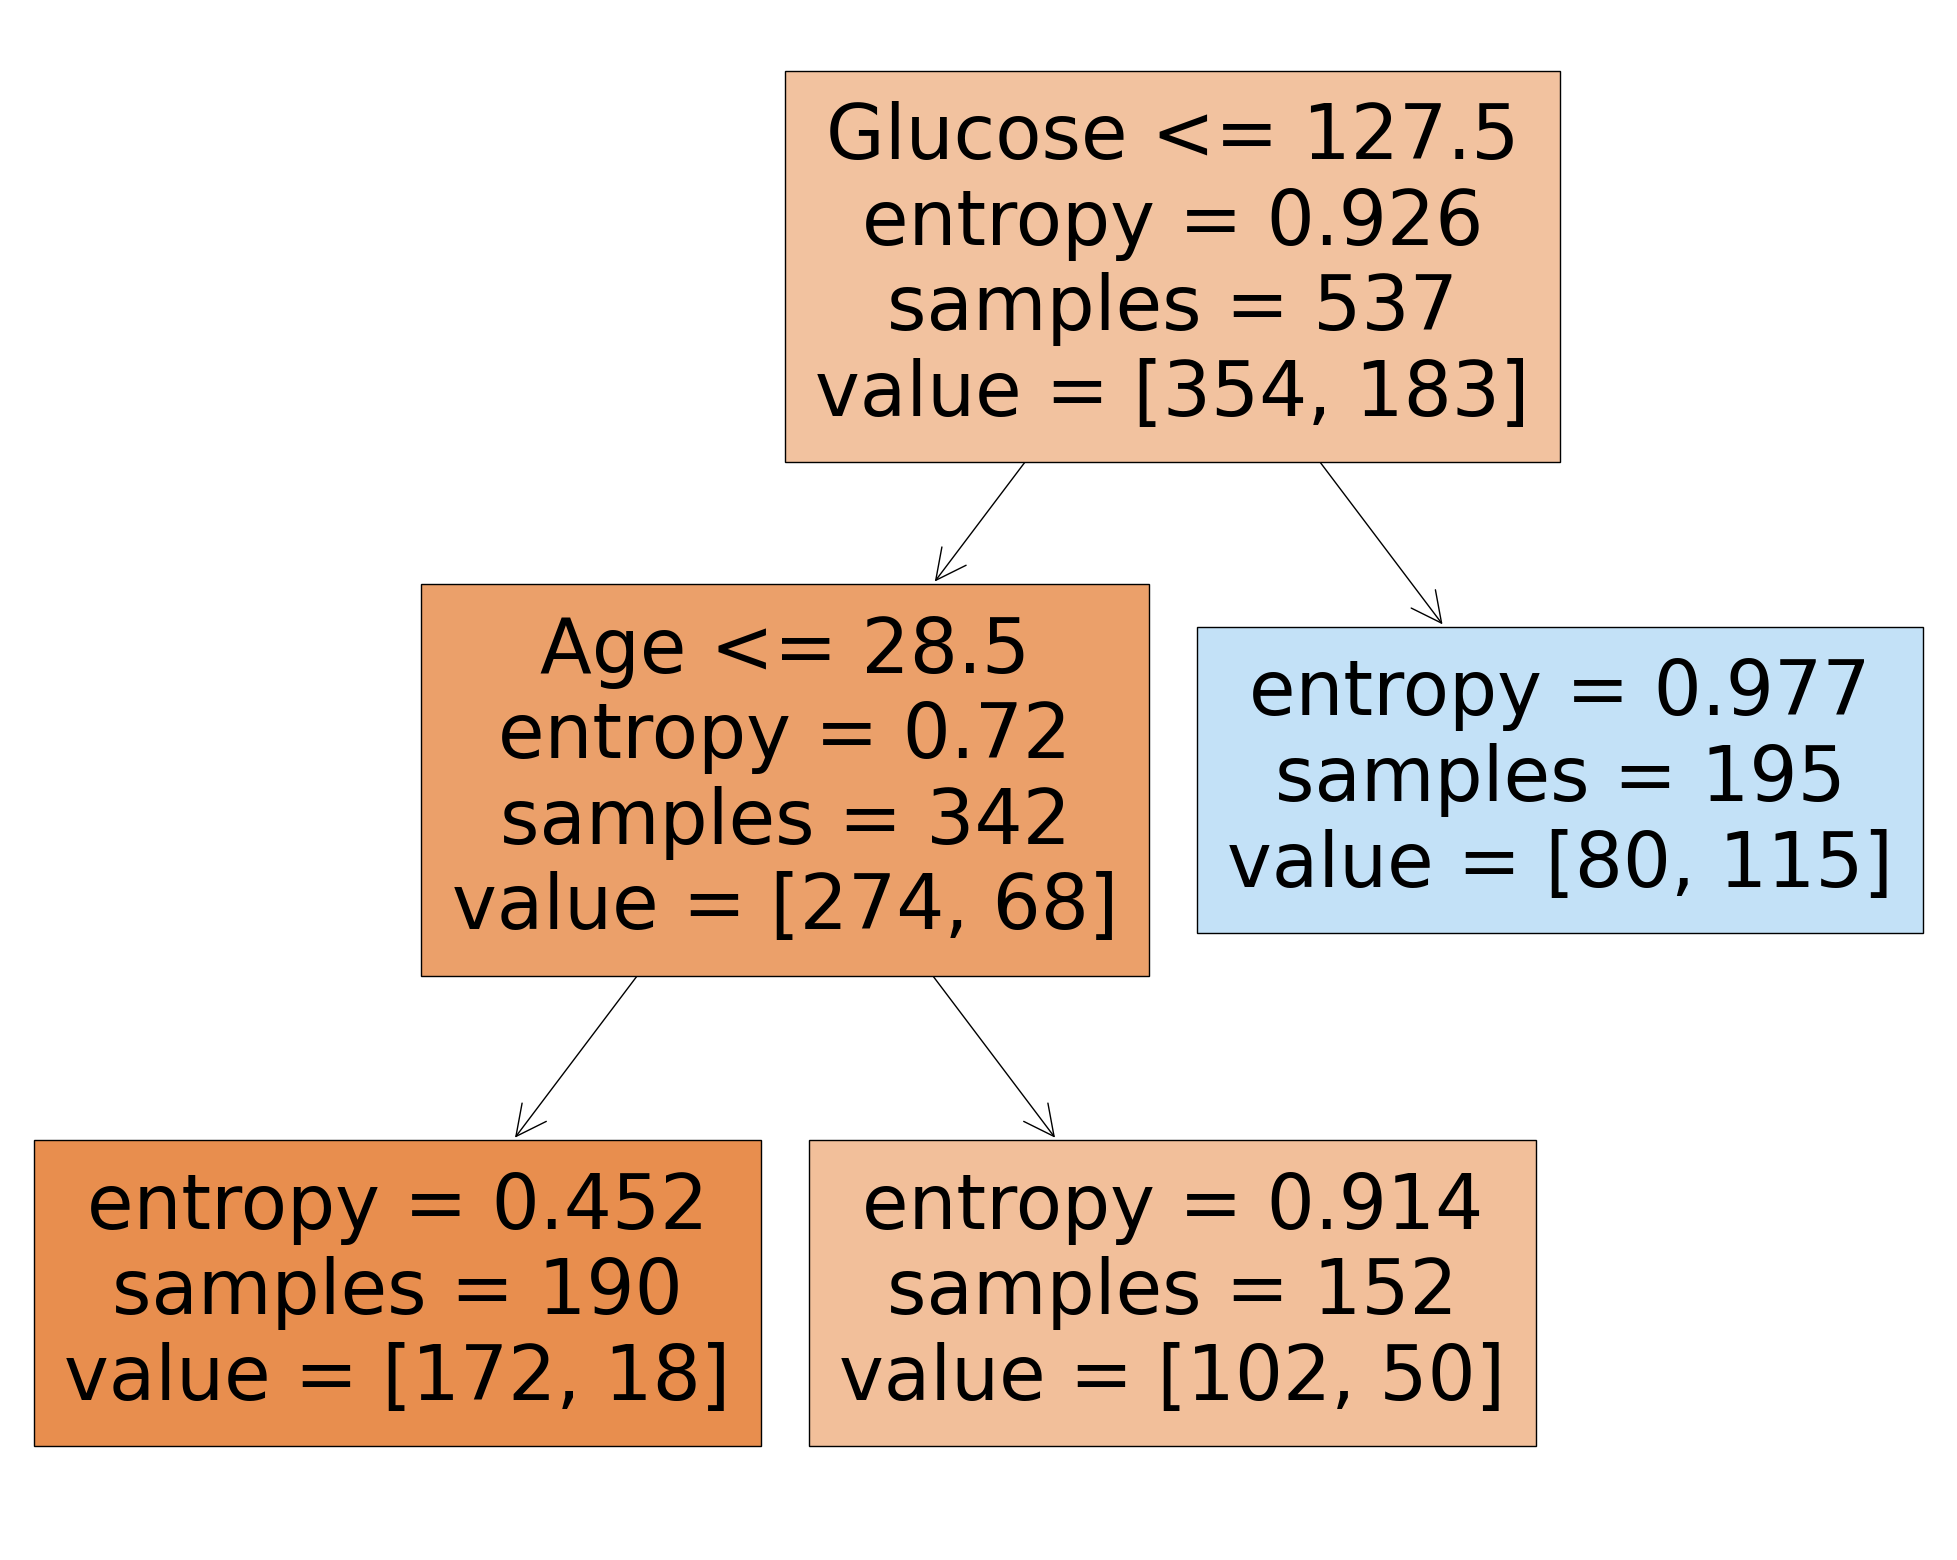

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(dt7,filled=True,feature_names=x.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [ ]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

In [ ]:
my_best_preds = grid_search.predict(xtest)

In [ ]:
accuracy_score(ytest, my_best_preds)

0.7402597402597403

In [ ]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       146
         1.0       0.70      0.52      0.59        85

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(x_test)

Predictions and Evaluations

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[117  33]
 [ 39  42]]


In [ ]:
print(accuracy_score(y_test,pred))

0.6883116883116883


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       150
           1       0.56      0.52      0.54        81

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231



Choosing a K Value

In [ ]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    score = accuracy_score(y_test,pred)
    accuracy_rate.append(score)


In [ ]:
accuracy_rate

[0.658008658008658,
 0.6883116883116883,
 0.6883116883116883,
 0.70995670995671,
 0.7359307359307359,
 0.7229437229437229,
 0.7142857142857143,
 0.7359307359307359,
 0.7229437229437229,
 0.7489177489177489,
 0.7272727272727273,
 0.7359307359307359,
 0.7186147186147186,
 0.7316017316017316,
 0.7229437229437229,
 0.7272727272727273,
 0.70995670995671,
 0.7402597402597403,
 0.7359307359307359,
 0.7445887445887446,
 0.7445887445887446,
 0.7445887445887446,
 0.7489177489177489,
 0.7575757575757576,
 0.7619047619047619,
 0.7359307359307359,
 0.7402597402597403,
 0.7402597402597403,
 0.7316017316017316,
 0.7359307359307359,
 0.7142857142857143,
 0.7359307359307359,
 0.7359307359307359,
 0.7445887445887446,
 0.7316017316017316,
 0.7359307359307359,
 0.7316017316017316,
 0.7359307359307359,
 0.7445887445887446]

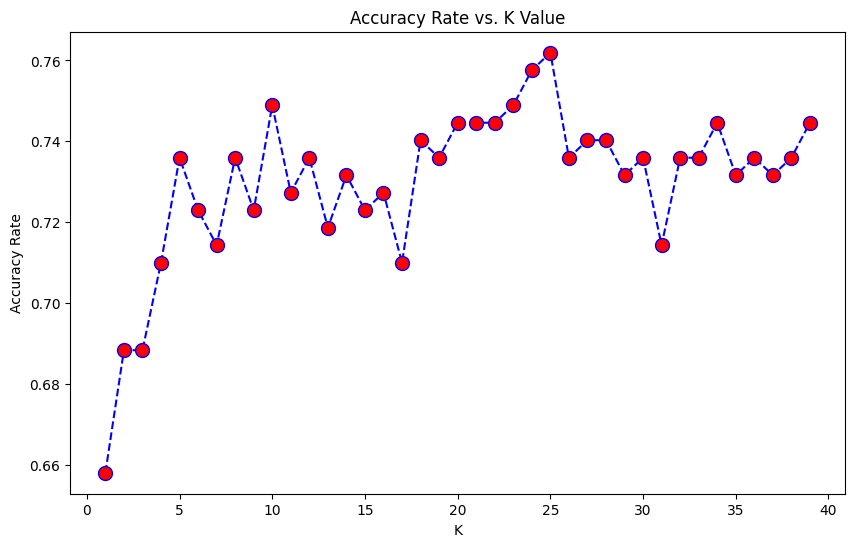

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[131  19]
 [ 53  28]]


0.6883116883116883


In [ ]:
# WITH K=5
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=21


[[132  18]
 [ 41  40]]


0.7445887445887446
